###  Q2. Do older planes suffer more delays?

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
six = pd.read_csv("2006.csv")
seven = pd.read_csv("2007.csv")
eight = pd.read_csv("2008.csv")

ontime = pd.concat([six, seven, eight])

In [3]:
planes = pd.read_csv("plane-data.csv")

In [4]:
## Using the database made in question 1

conn = sqlite3.connect('airline2_python.db')

c = conn.cursor()

In [5]:
# Checking if "older" planes actually experience more delays in this case for outliers
## We check the mean average of their DepDelay and ArrDelay

c.execute('''
SELECT planes.issue_date AS Issue_Date, DepDelay AS DepDelay, ArrDelay AS ArrDelay
FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
WHERE ArrDelay >= 0 AND DepDelay > 0
GROUP BY Issue_Date
ORDER BY ArrDelay DESC
''')

IssueDate = c.fetchall()

IssueDate = pd.DataFrame(IssueDate)
IssueDate.columns = ['Issue_Date','DepDelay','ArrDelay']
IssueDate['TotalDelay'] = IssueDate['DepDelay'] + IssueDate['ArrDelay']
IssueDate[:10]

## For dates ranging from 1976 ~ 2008, this might seem contradictory to the question in a sense,
## The more "newer" planes have experienced more delays as compared to its "older" counterparts

,Issue_Date,DepDelay,ArrDelay,TotalDelay
0,08/16/2000,1345,1329,2674
1,07/20/2006,724,715,1439
2,05/15/2000,429,428,857
3,04/01/1998,441,415,856
4,08/23/2004,392,405,797
5,03/05/2001,383,383,766
6,04/25/2002,319,353,672
7,09/17/1997,312,324,636
8,07/17/1997,317,320,637
9,07/28/2004,313,311,624


In [6]:
c.execute('''
SELECT planes.issue_date as Issue_Date, AVG(CarrierDelay) AS CarrierDelay, 
AVG(WeatherDelay) AS WeatherDelay, AVG(NASDelay) AS NASDelay, AVG(SecurityDelay) AS SecurityDelay, AVG(LateAircraftDelay) AS LateAircraftDelay
FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
WHERE CarrierDelay > 0
GROUP BY Issue_Date
ORDER BY CarrierDelay DESC
''')

CarDelay = c.fetchall()

In [7]:
CarDelay = pd.DataFrame(CarDelay)
CarDelay.columns = ['Issue_Date','AVG_CarrierDelay','AVG_WeatherDelay','AVG_NASDelay','AVG_SecurityDelay','AVG_LateAircraftDelay']
CarDelay['AvgDelay'] = CarDelay['AVG_CarrierDelay'] + CarDelay['AVG_WeatherDelay'] + CarDelay['AVG_NASDelay'] + CarDelay['AVG_SecurityDelay'] + CarDelay['AVG_LateAircraftDelay']
CarDelay[:10]

## The results leans more into the idea that newer planes experience more delays as compared to its older counter parts.

,Issue_Date,AVG_CarrierDelay,AVG_WeatherDelay,AVG_NASDelay,AVG_SecurityDelay,AVG_LateAircraftDelay,AvgDelay
0,08/23/2004,210.333333,0.00000,4.333333,0.0,0.000000,214.666667
1,04/05/2007,206.000000,0.00000,16.454545,0.0,6.818182,229.272727
2,01/26/1998,144.000000,0.00000,4.300000,0.0,0.000000,148.300000
3,11/25/2003,143.000000,0.00000,0.000000,0.0,13.333333,156.333333
4,09/29/2003,140.789474,0.00000,11.000000,0.0,14.631579,166.421053
5,10/31/2003,109.875000,0.00000,24.875000,0.0,0.125000,134.875000
6,05/15/2000,85.500000,0.00000,7.600000,0.0,9.000000,102.100000
7,07/22/1997,83.285714,0.00000,3.142857,0.0,1.428571,87.857143
8,05/22/1992,82.059524,0.02381,7.476190,0.0,6.428571,95.988095
9,01/23/1990,81.833333,0.00000,4.833333,0.0,16.500000,103.166667


In [8]:
CarDelay["Issue_Date"] = pd.to_datetime(CarDelay['Issue_Date'], errors='coerce', format = '%m/%d/%Y')
CarDelay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Issue_Date             2406 non-null   datetime64[ns]
 1   AVG_CarrierDelay       2408 non-null   float64       
 2   AVG_WeatherDelay       2408 non-null   float64       
 3   AVG_NASDelay           2408 non-null   float64       
 4   AVG_SecurityDelay      2408 non-null   float64       
 5   AVG_LateAircraftDelay  2408 non-null   float64       
 6   AvgDelay               2408 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 131.8 KB


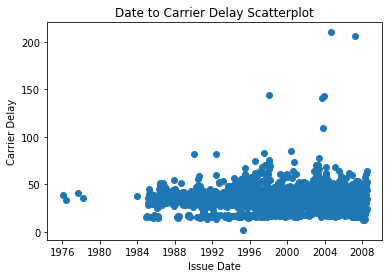

In [25]:
## Scatterplot for Date against CarDelay
from matplotlib import pyplot as plt

plt.scatter(x = CarDelay.Issue_Date, y = CarDelay.AVG_CarrierDelay)

plt.xlabel("Issue Date")
plt.ylabel("Carrier Delay")
plt.title("Date to Carrier Delay Scatterplot")
 
plt.show()

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(CarDelay['Issue_Date']).reshape((-1, 1))
y = np.array(CarDelay['AVG_CarrierDelay'])
model = LinearRegression().fit(x , y)
print('Coefficient of Date', model.coef_)

## The coefficient differs from what R derived however it also shows a negative coefficient hence implying that older planes do indeed
## suffer more delays as compared to newer planes. Since the negative coefficient would mean that the newer the plane is, the less carrier
## delays its likely to expect 

Coefficient of Date [-1.36277504e-18]
